In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from collections import Counter
%matplotlib inline

# train test split
from sklearn.model_selection import train_test_split

# presentation
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix


In [ ]:
pip install underthesea

In [ ]:
from underthesea import word_tokenize
import json
import re

In [ ]:
file_in = '/content/drive/My Drive/data.json'
file_out = '/content/drive/My Drive/list_words.json'

df=pd.read_json(file_in)

def process_text(text):
    # Loại bỏ các từ chứa số
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    # Loại bỏ các ký tự đặc biệt
    text = re.sub(r'[^\w\s]', '', text)
    # Chuyển về in thường
    text = text.lower()
    # Loại bỏ khoảng trắng thừa
    text = re.sub(r'\s+', ' ', text).strip()
    # Phân tách từ
    words = word_tokenize(text)
    return words

df['tokenized_text'] = df['text'].apply(process_text)

df.drop(columns=['text'], inplace=True)

df.to_json(file_out, orient='records', force_ascii=False, indent=4)


In [ ]:
import json

path_in = '/content/drive/My Drive/list_words.json'

with open(path_in, 'r', encoding='utf-8') as file:
  data=json.load(file)
df=pd.DataFrame(data)
df.columns=['id', 'label', 'text']
df.drop(columns=['id'], inplace=True)
df.head()

,label,text
0,Du lich,"[theo, hành trình, tour, du lịch, mỹ bờ, đông,..."
1,Nha dat,"[mình, cần, tìm, phòng, cho, khoảng, người, qu..."
2,Nha dat,"[cho, thuê, nhà riêng, dt, sàn, có, phòng, ngủ..."
3,Nha dat,"[cho, thuê, nhà, ở, tầng, khép kín, nguyễn kho..."
4,Mua sam,"[crumpler, jackpack, full, photo, giá, vnđ, gi..."


In [ ]:
stopword_path='/content/drive/My Drive/vietnamese-stopwords.txt'
with open(stopword_path, 'r', encoding='utf-8') as file:
    stop_words = file.readlines()

stop_words = [line.strip() for line in stop_words]

In [ ]:
def filter_stop_words(word_list):
    return [word for word in word_list if word not in stop_words]

df['text'] = df['text'].apply(filter_stop_words)

In [ ]:
from collections import defaultdict

def count_words_in_df(df):
    grouped = df.groupby('label')['text'].apply(list)

    word_counts = []
    word_in_arrays = []

    for label, lists in grouped.items():
        word_count = defaultdict(int)
        word_in_array = defaultdict(int)

        for arr in lists:
            unique_words = set(arr)
            for word in arr:
                word_count[word] += 1
            for word in unique_words:
                word_in_array[word] += 1
        sorted_wc = dict(sorted(word_count.items(), key=lambda x: x[1], reverse=True)[:15])

        word_counts.append((label, sorted_wc))
        word_in_arrays.append((label, {word: word_in_array[word] for word in sorted_wc}))
    return word_counts, word_in_arrays

word_counts, word_in_arrays = count_words_in_df(df)


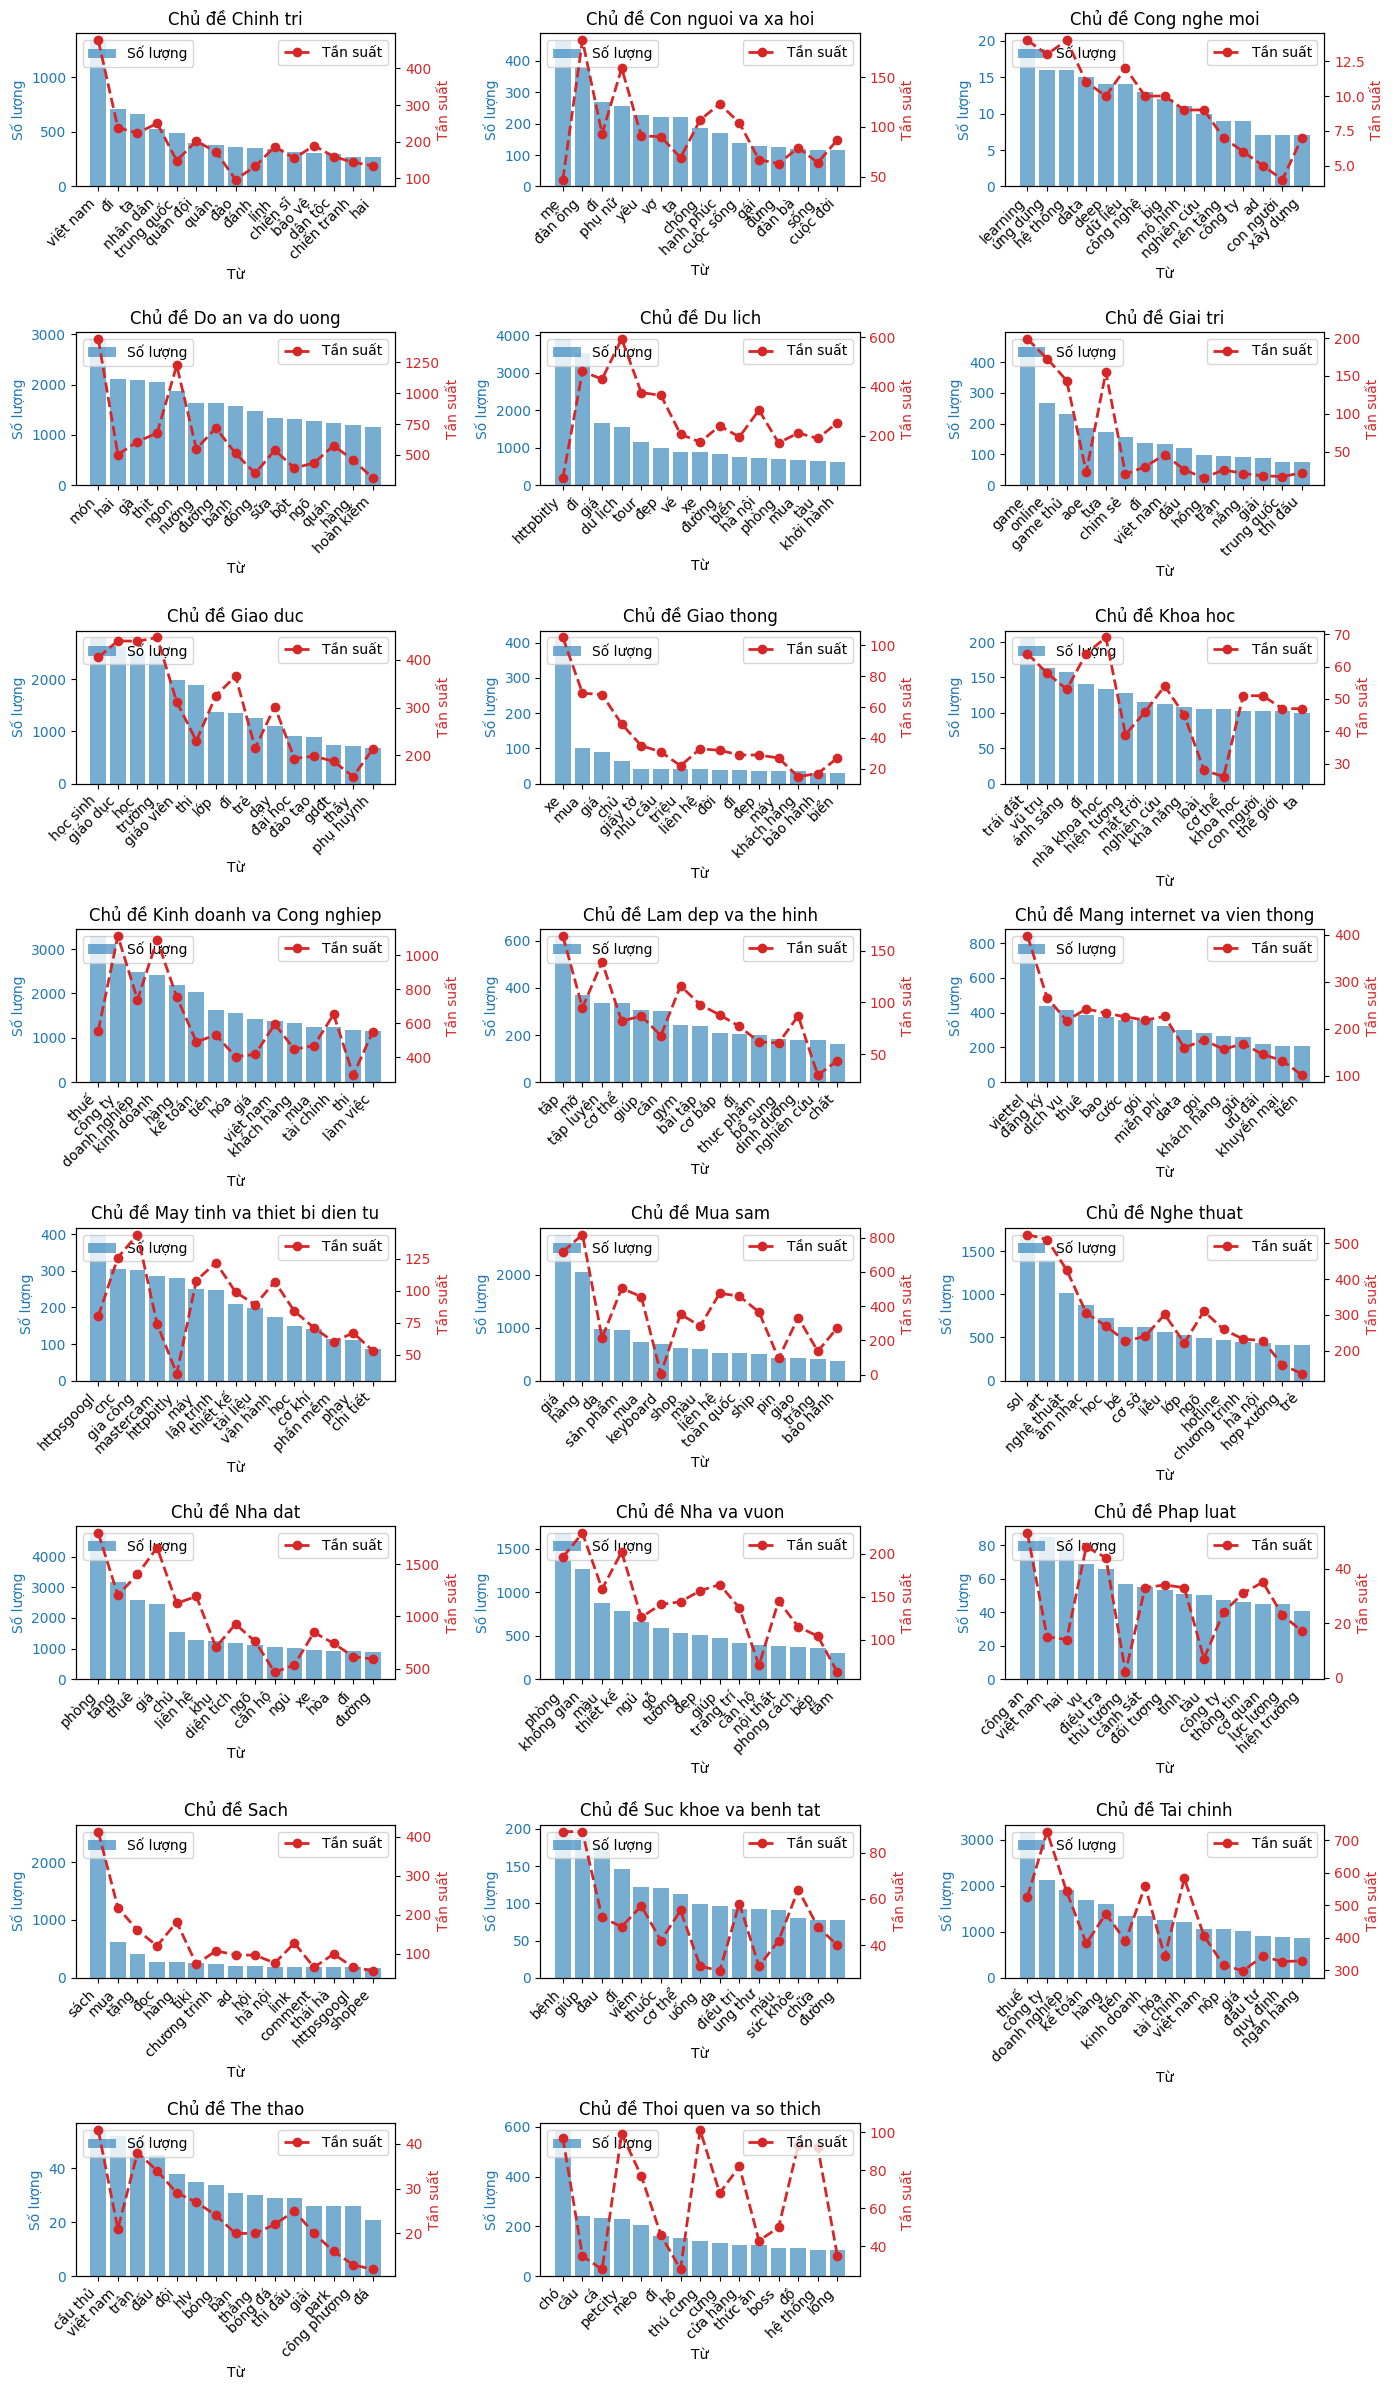

In [ ]:
import math

# Xác định số lượng biểu đồ con cần vẽ
num_plots = len(word_counts)
num_columns = 3
num_rows = math.ceil(num_plots / num_columns)

# Tạo figure và các trục con
fig, axes = plt.subplots(num_rows, num_columns, figsize=(14, num_rows * 3))

# Chuyển đổi axes thành 1D array để dễ dàng lập chỉ mục
axes = axes.flatten()

# Vẽ biểu đồ cho từng chủ đề
for ax, (label, wc) in zip(axes, word_counts):
    words = list(wc.keys())
    counts = list(wc.values())
    array_counts = [dict(word_in_arrays)[label][word] for word in words]

    color = 'tab:blue'
    ax.set_xlabel('Từ')
    ax.set_ylabel('Số lượng', color=color)
    ax.bar(words, counts, color=color, alpha=0.6, label='Số lượng')
    ax.tick_params(axis='y', labelcolor=color)
    ax.legend(loc='upper left')

    # Xoay các nhãn trục x
    ax.set_xticks(range(len(words)))
    ax.set_xticklabels(words, rotation=45, ha='right')

    ax2 = ax.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Tần suất', color=color)
    ax2.plot(words, array_counts, color=color, marker='o', linestyle='dashed', linewidth=2, markersize=6, label='Tần suất')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    ax.set_title(f'Chủ đề {label}')

# Xóa các subplot dư thừa nếu có
for i in range(len(word_counts), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

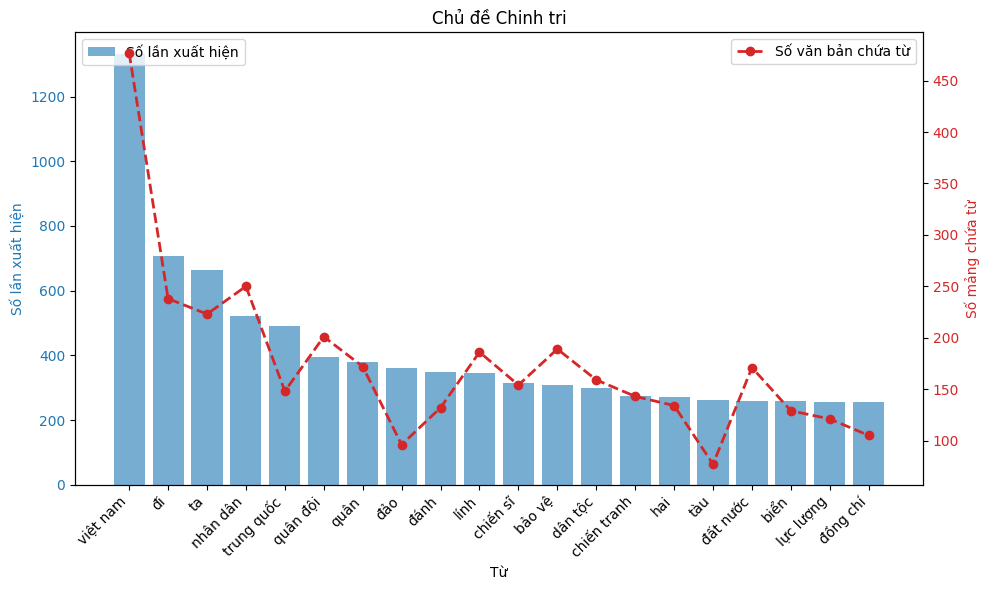

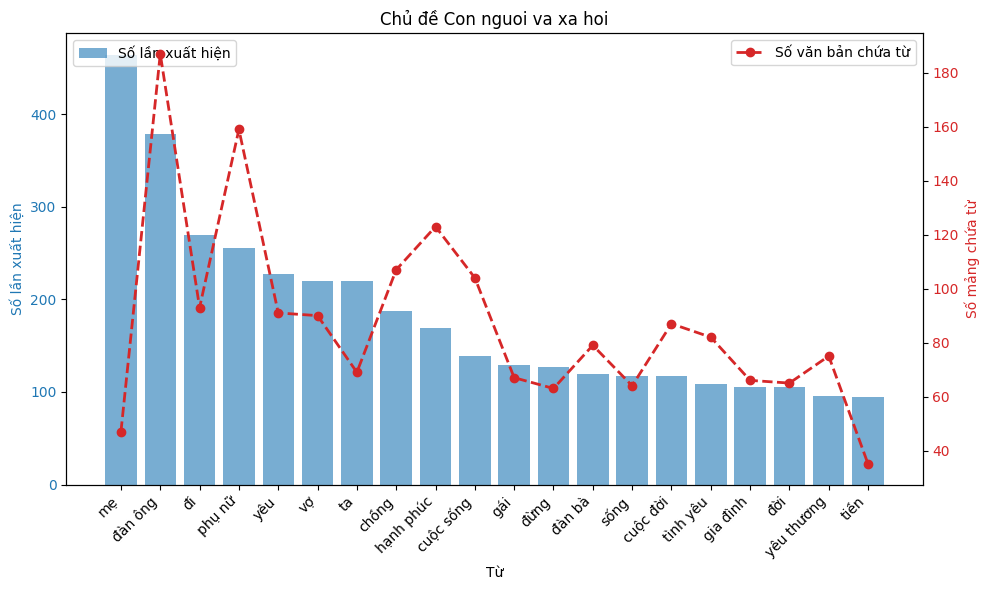

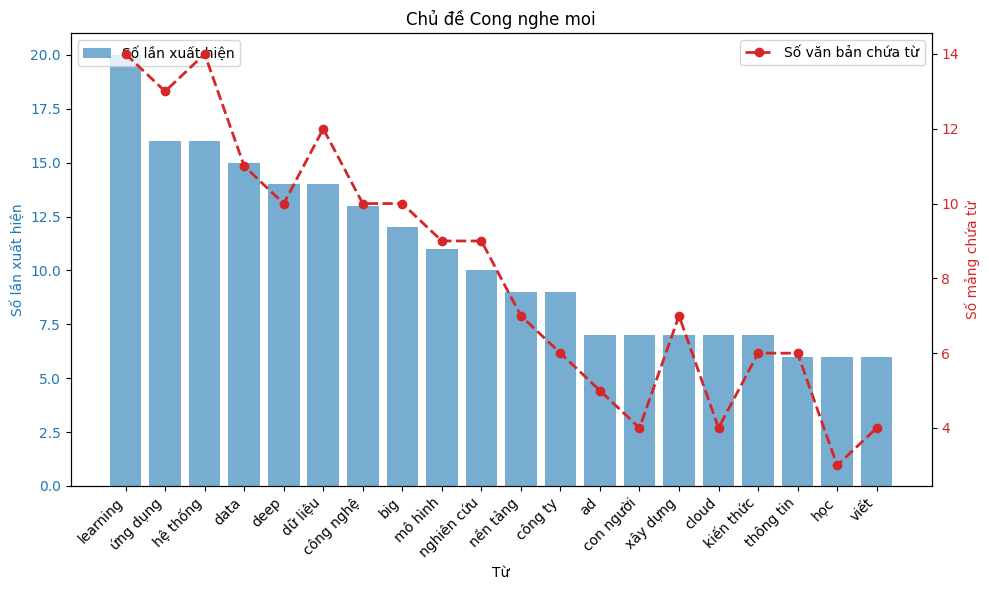

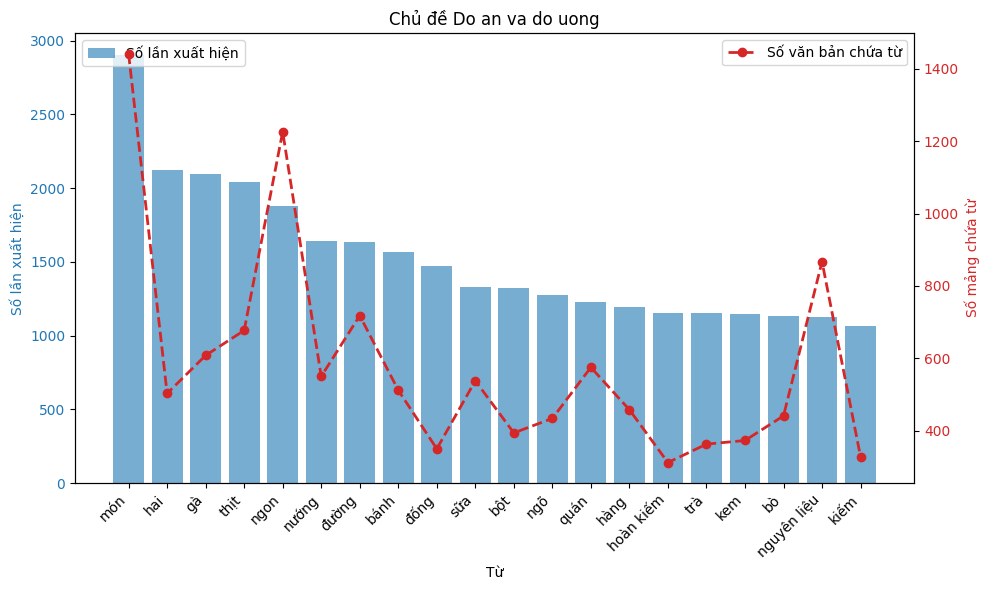

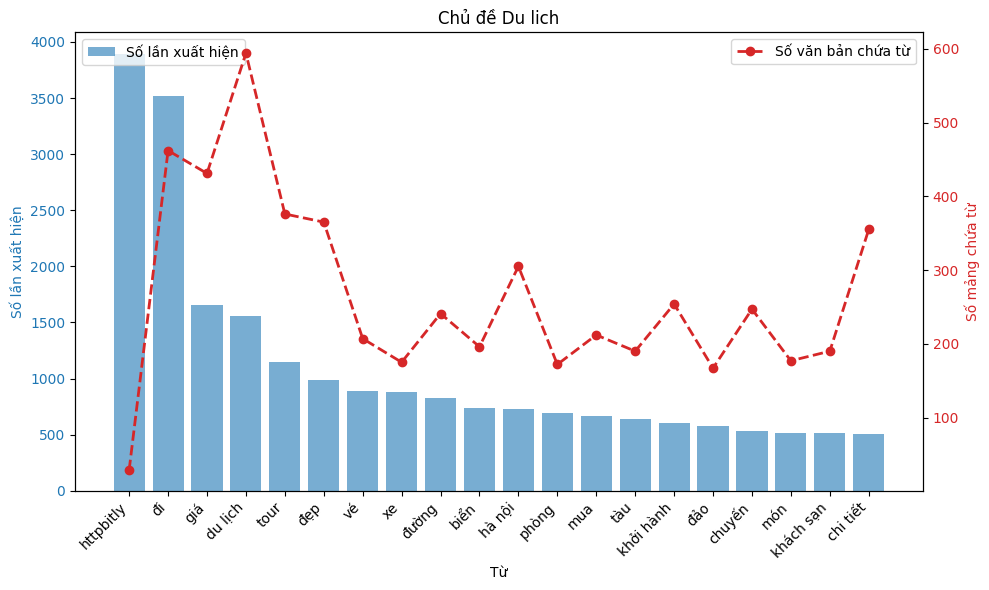

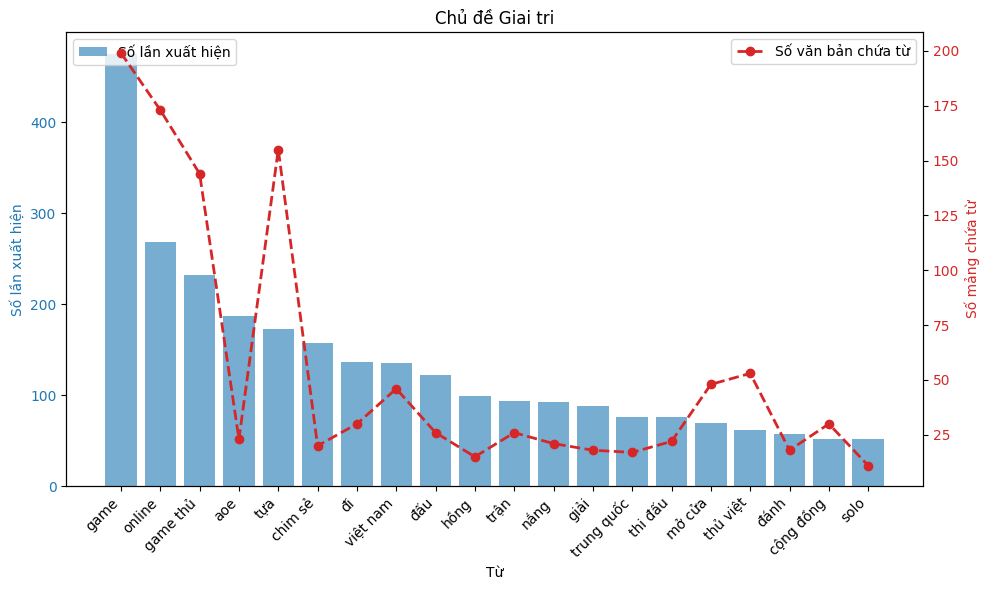

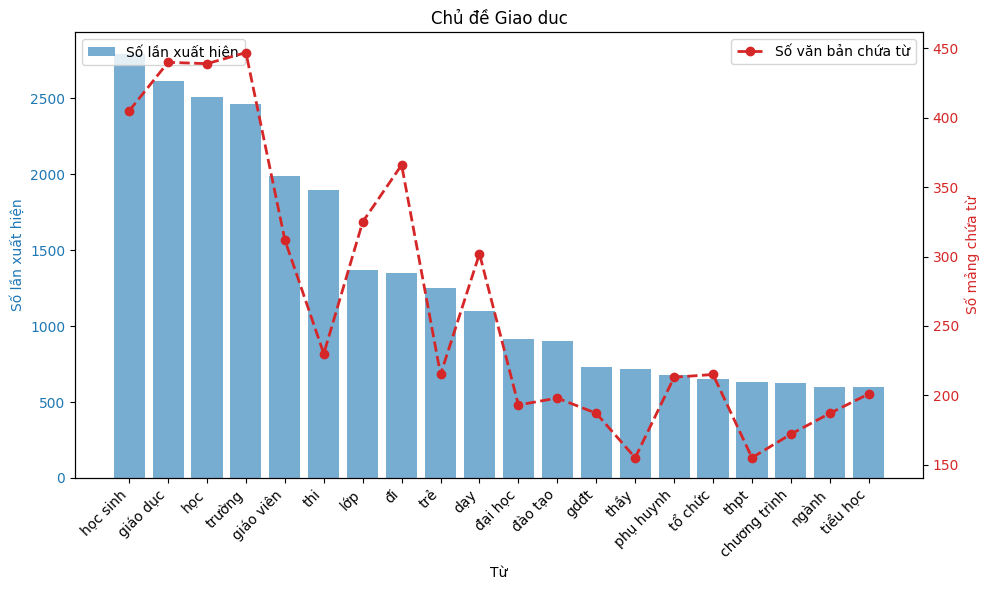

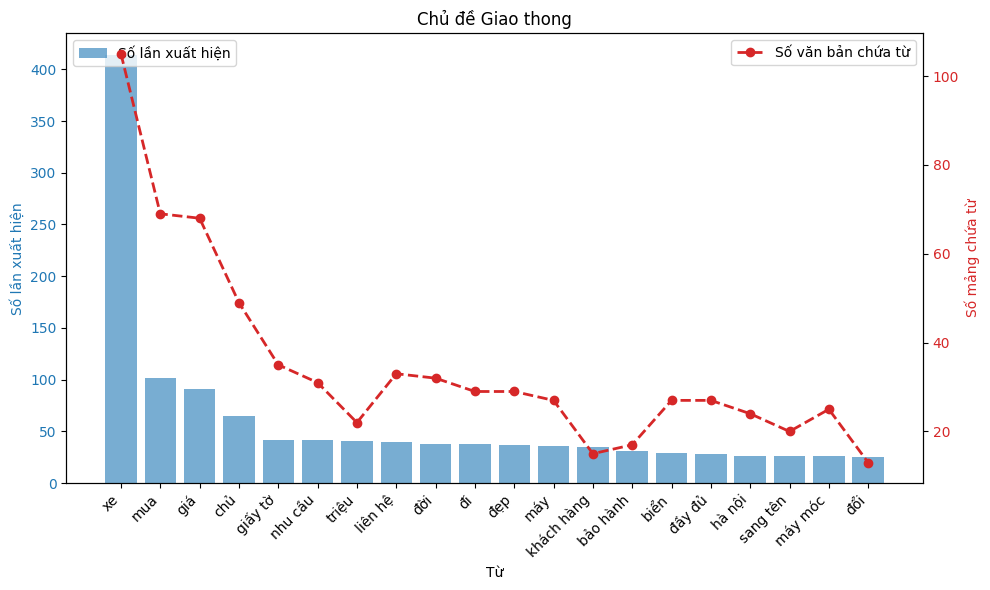

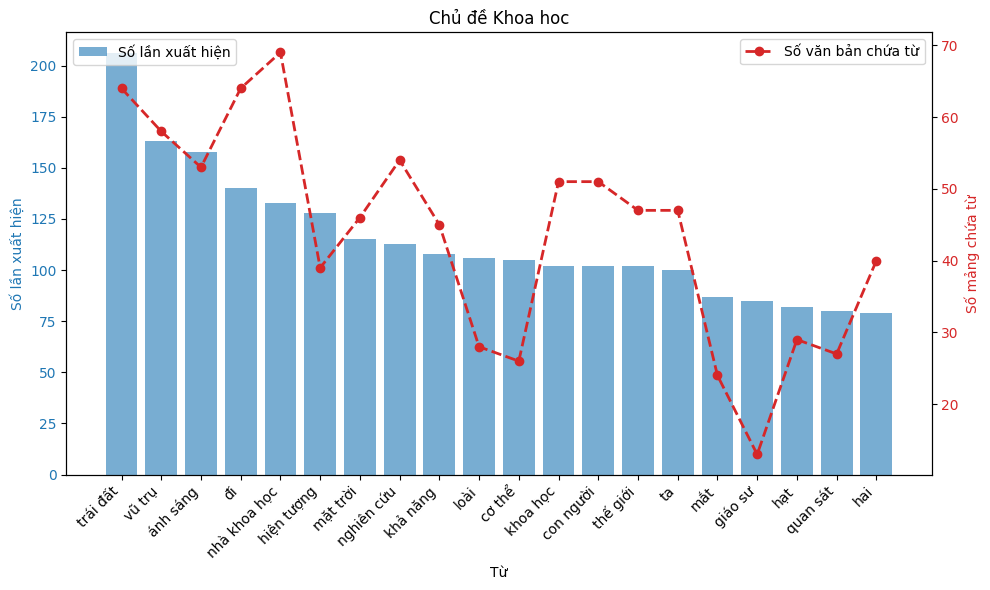

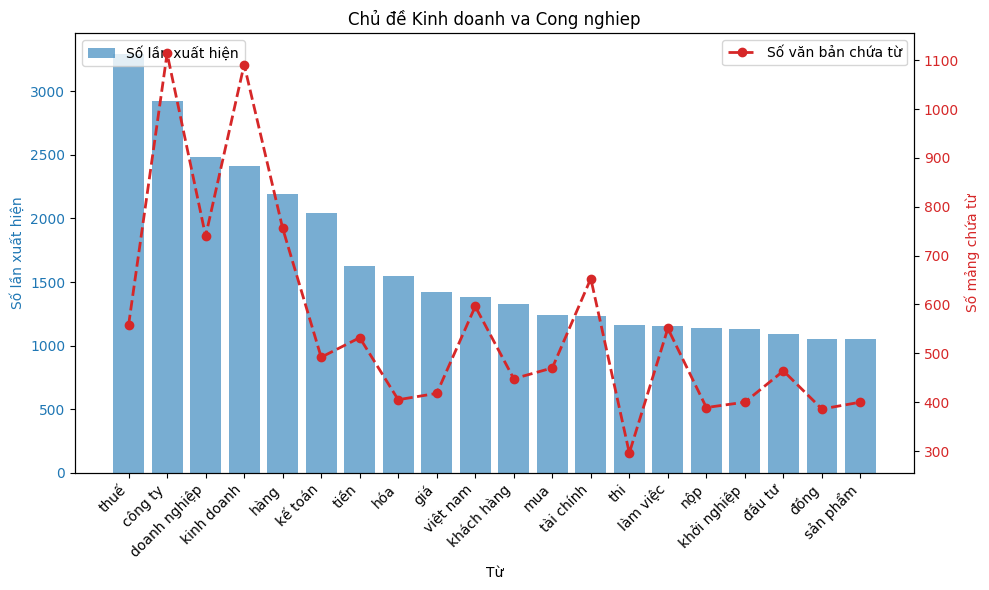

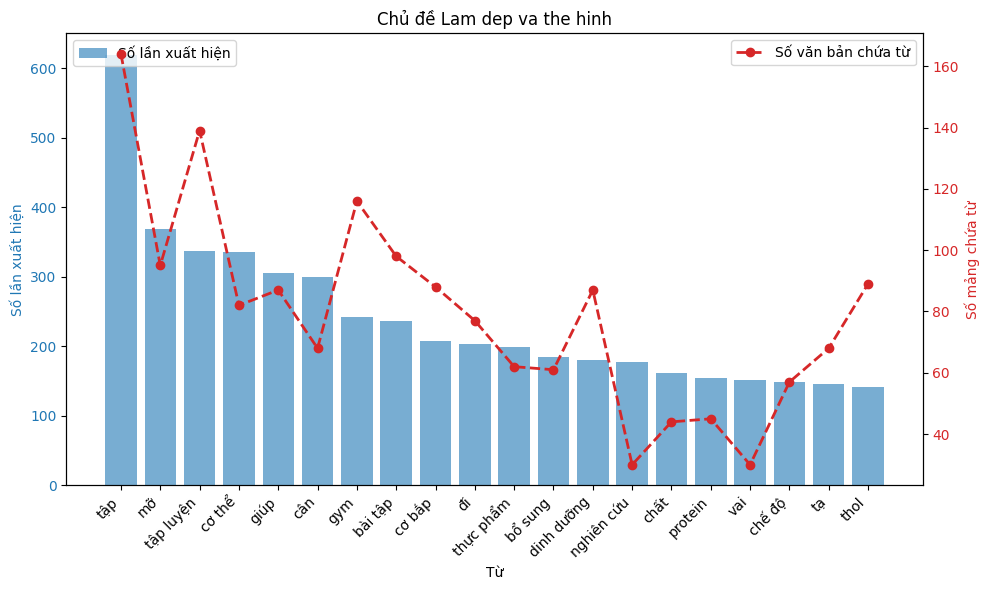

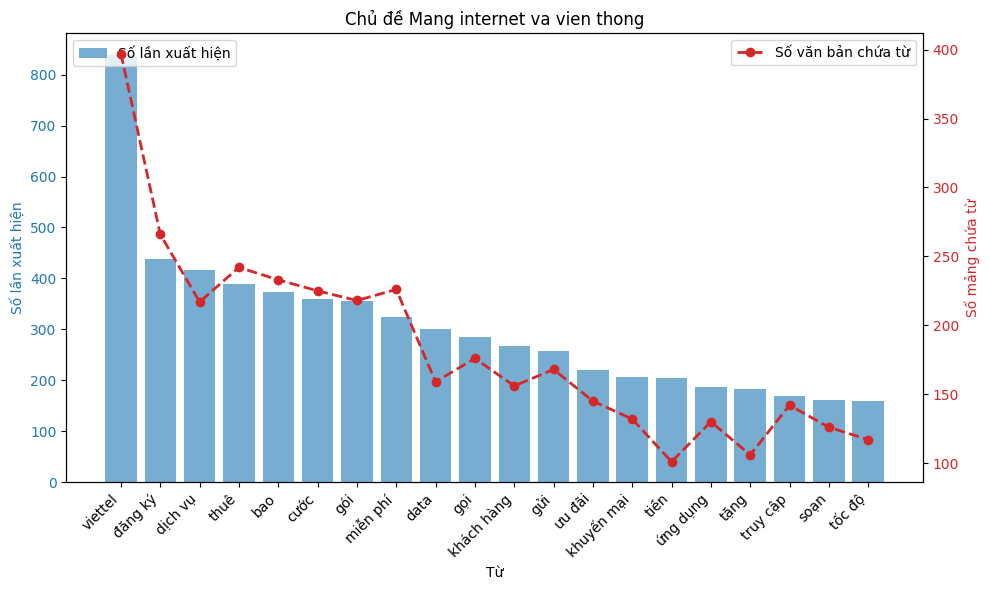

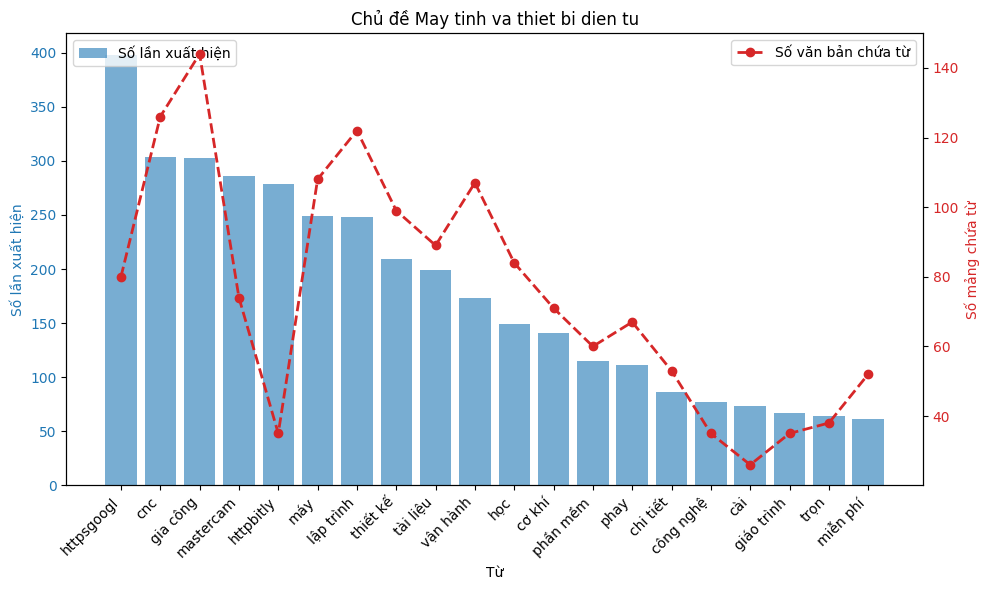

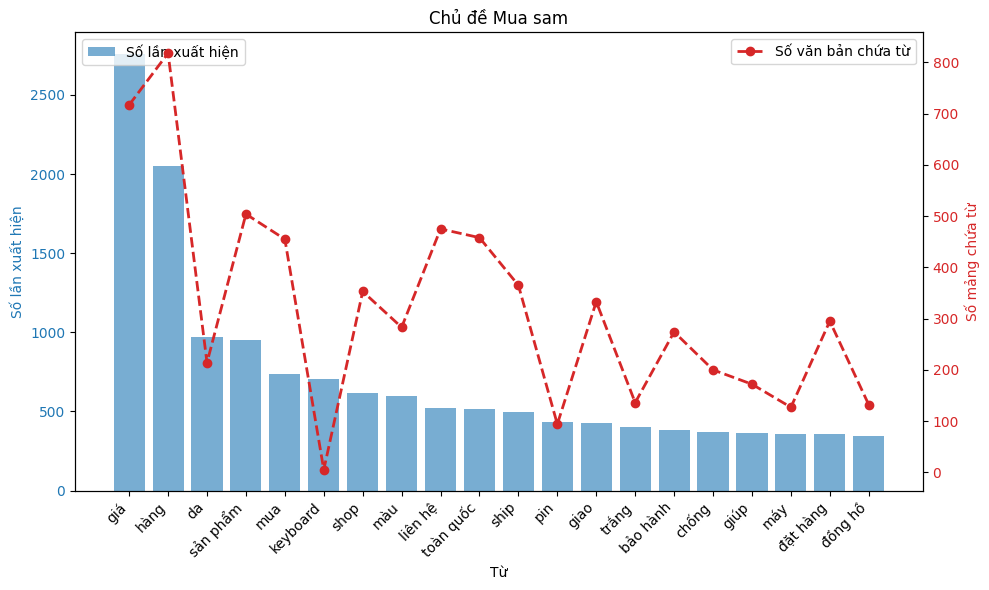

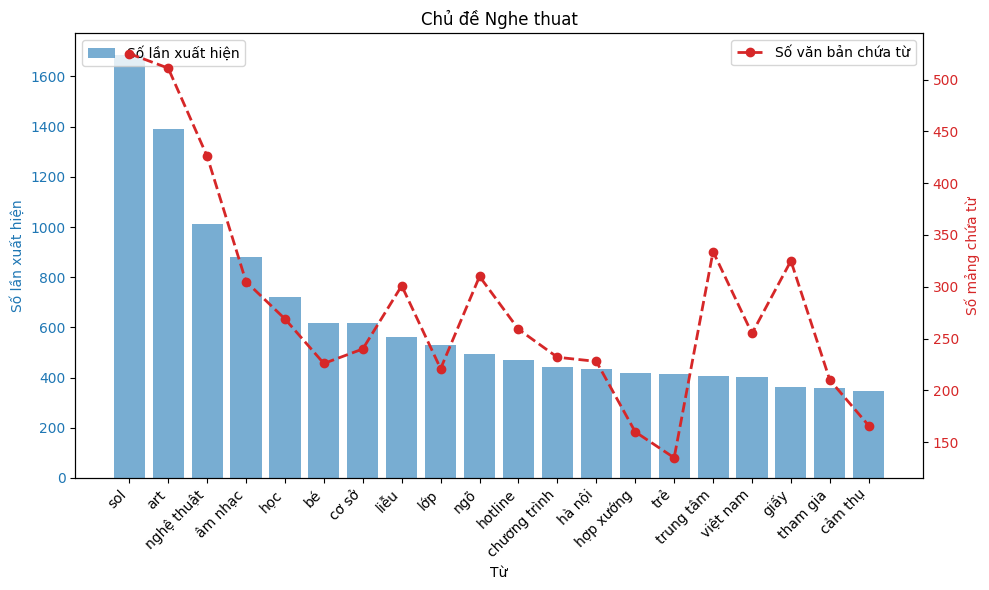

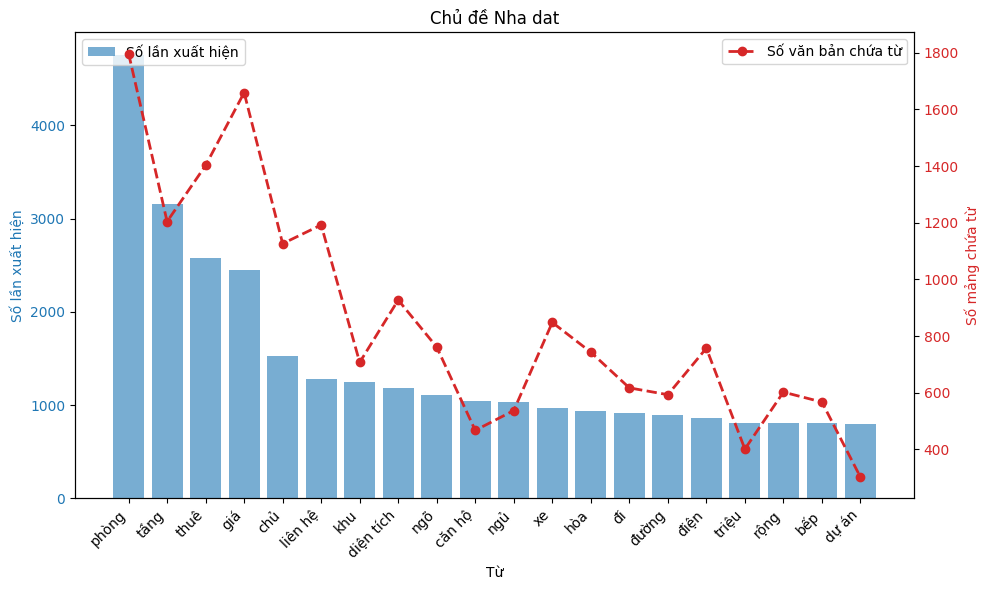

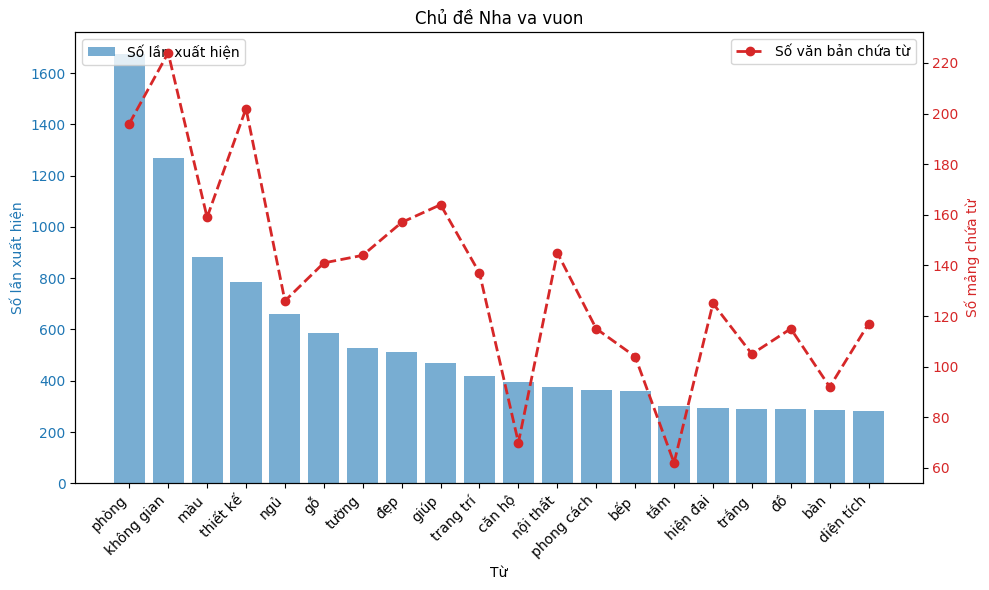

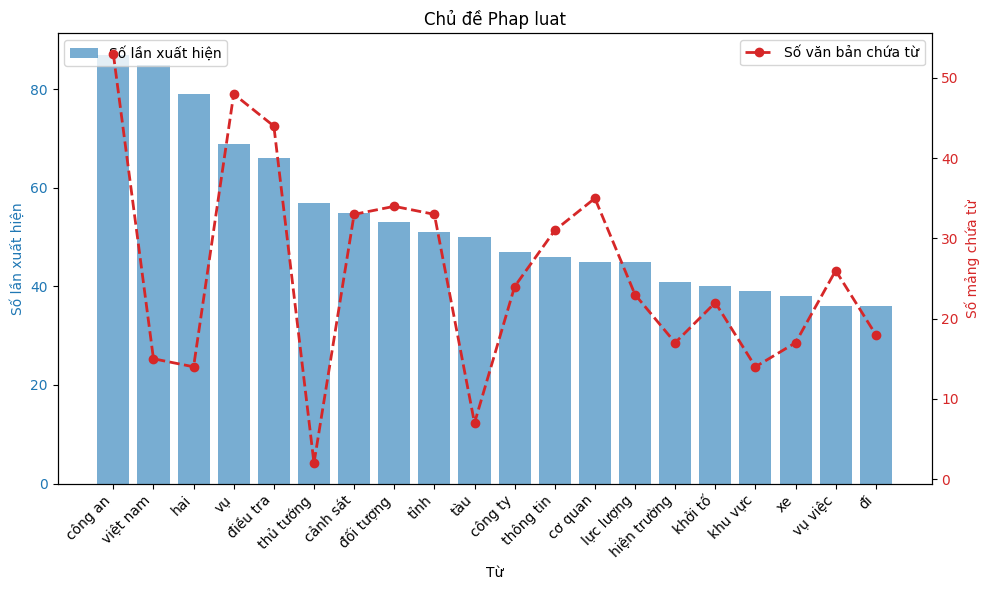

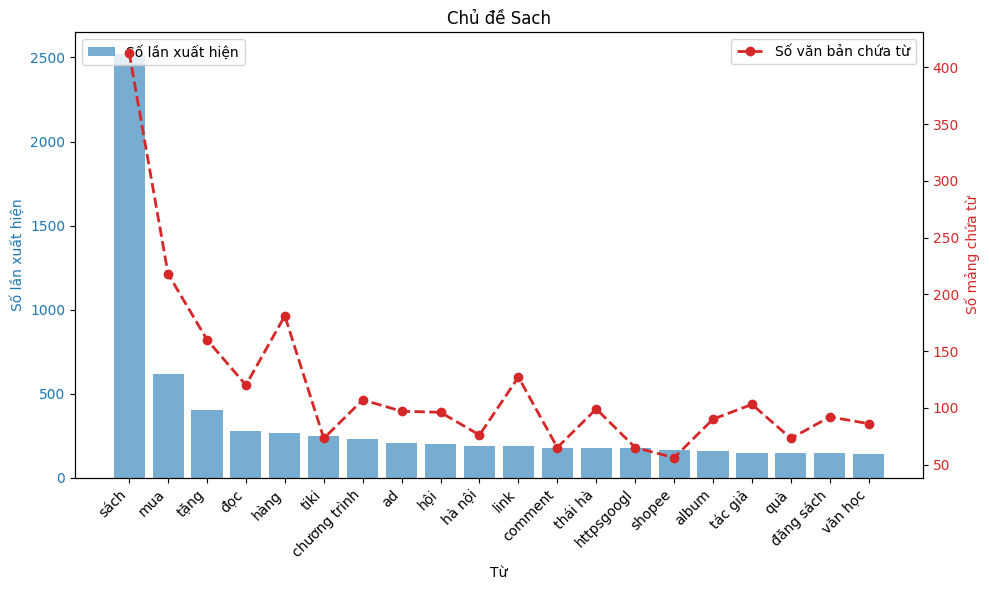

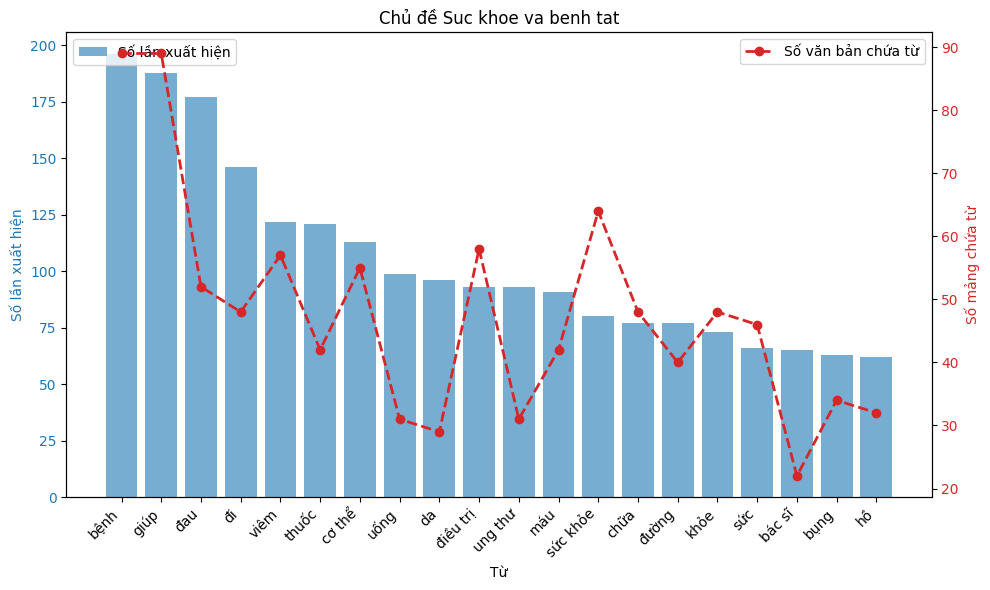

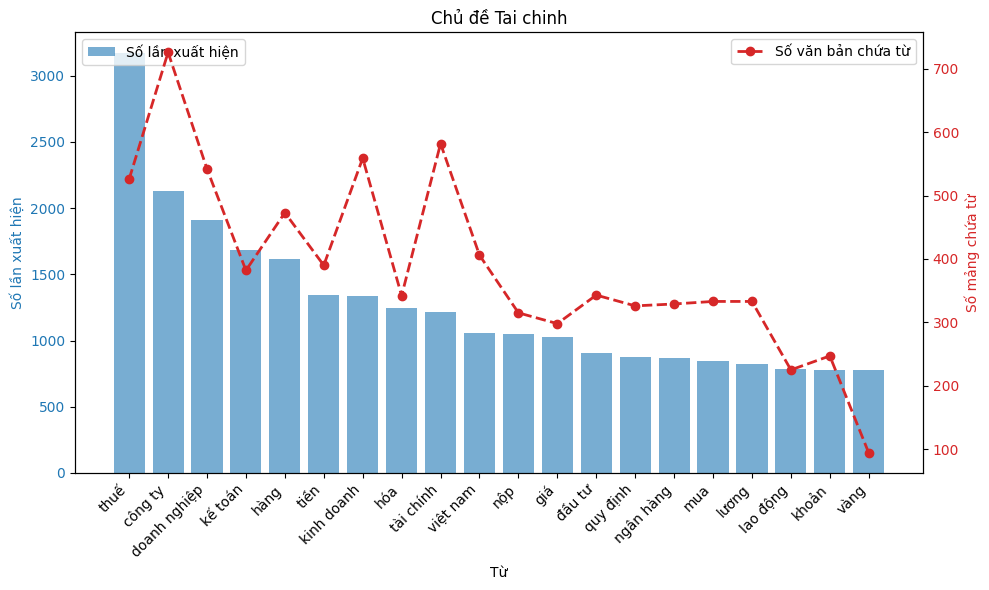

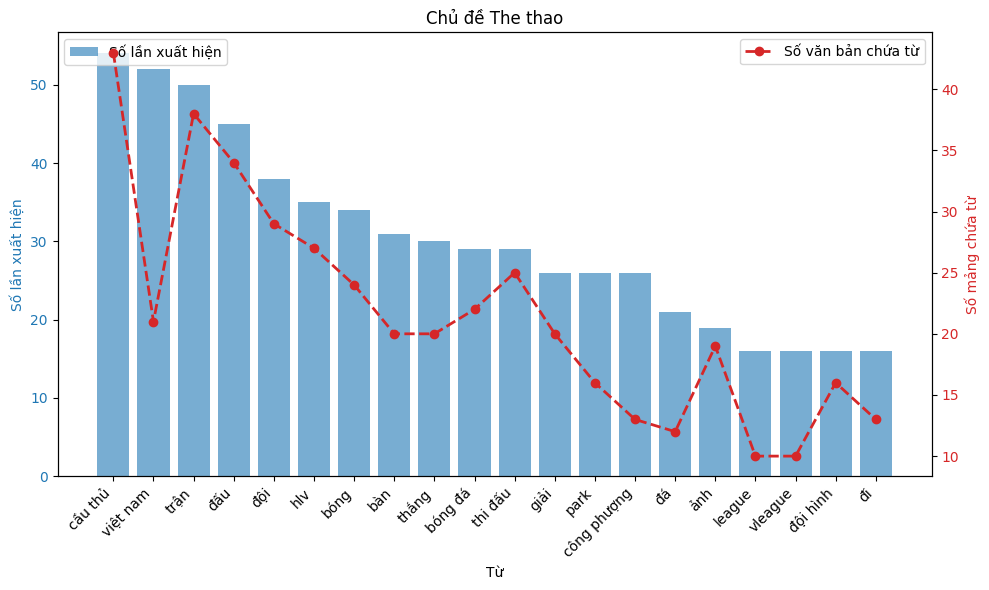

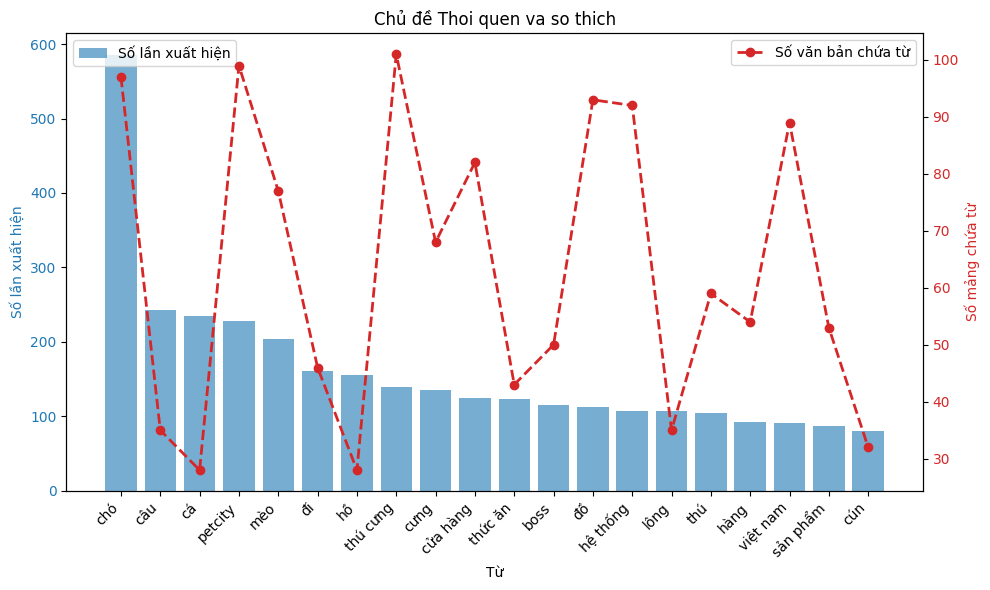

In [ ]:
for label, wc in word_counts:
    words = list(wc.keys())
    counts = list(wc.values())
    array_counts = [dict(word_in_arrays)[label][word] for word in words]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Từ')
    ax1.set_ylabel('Số lần xuất hiện', color=color)
    ax1.bar(words, counts, color=color, alpha=0.6, label='Số lần xuất hiện')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    ax1.set_xticks(range(len(words)))
    ax1.set_xticklabels(words, rotation=45, ha='right')

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Số mảng chứa từ', color=color)
    ax2.plot(words, array_counts, color=color, marker='o', linestyle='dashed', linewidth=2, markersize=6, label='Số văn bản chứa từ')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    plt.title(f'Chủ đề {label}')
    fig.tight_layout()
    plt.show()